In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
titanic = pd.read_csv("train_and_test2.csv")
iris = pd.read_csv('iris.csv')


In [4]:
# Titanic Dataset
print("Titanic Missing Data:\n", titanic.isnull().sum())
print("\nTitanic Data Types:\n", titanic.dtypes)

# Iris Dataset
print("\nIris Missing Data:\n", iris.isnull().sum())
print("\nIris Data Types:\n", iris.dtypes)


Titanic Missing Data:
 Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Survived       0
Embarked       2
Pclass         0
dtype: int64

Titanic Data Types:
 Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
Parch            int64
Survived         int64
Embarked       float64
Pclass           int64
dtype: object

Iris Missing Data:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Iris Data Types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


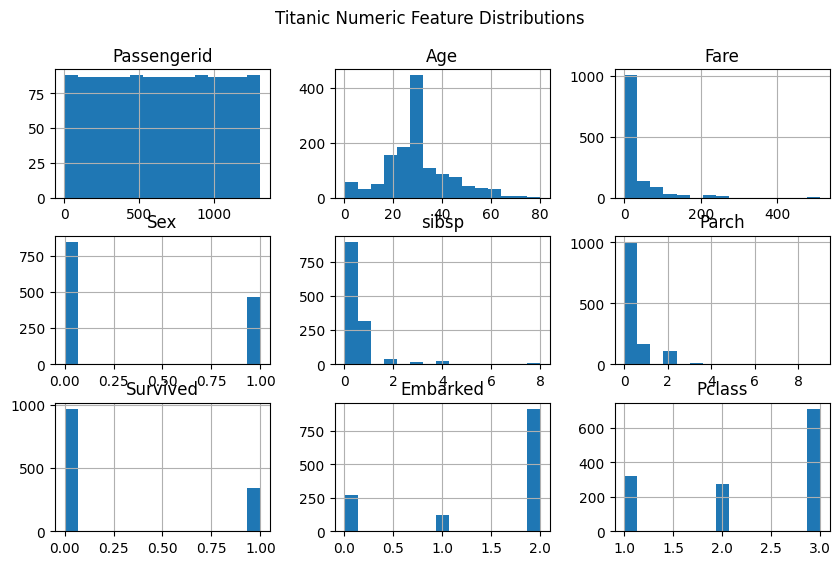

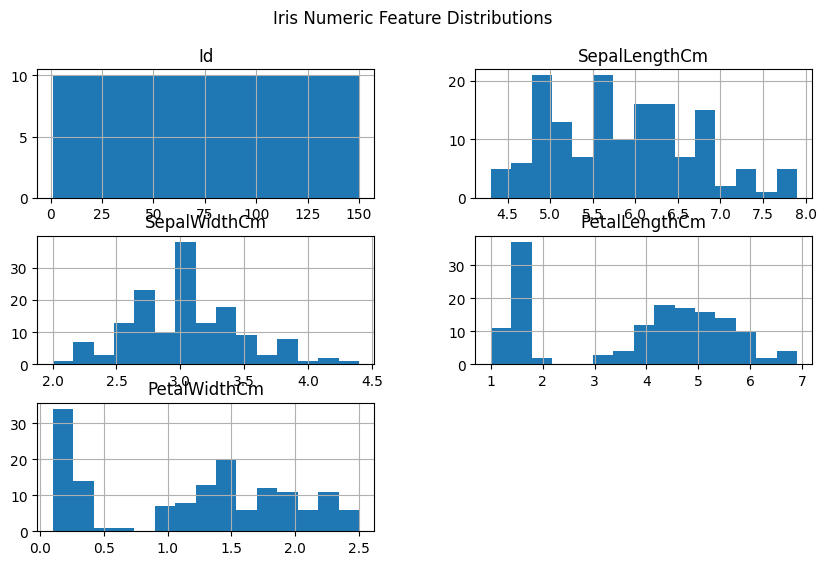

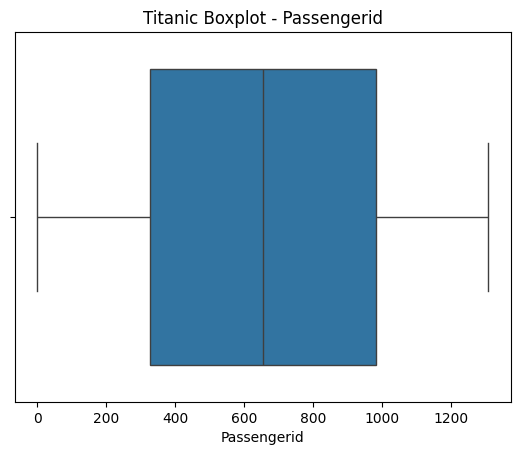

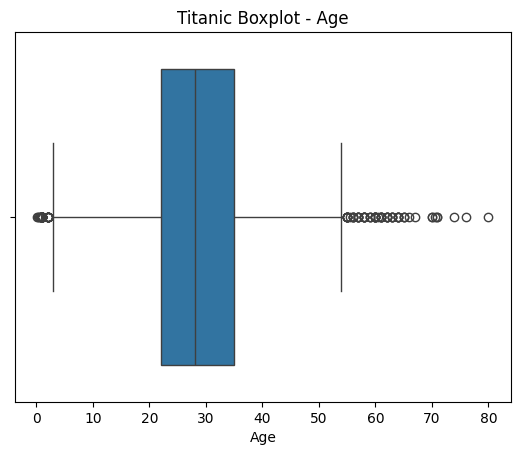

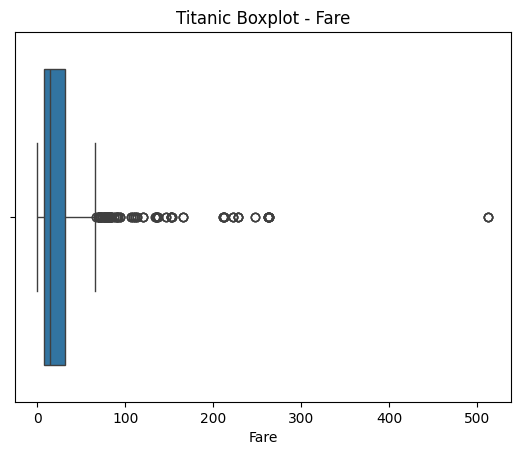

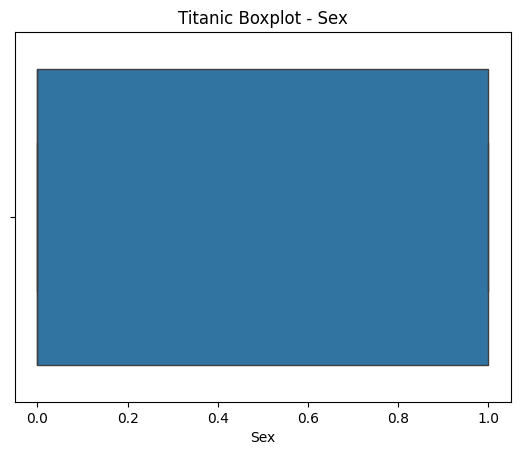

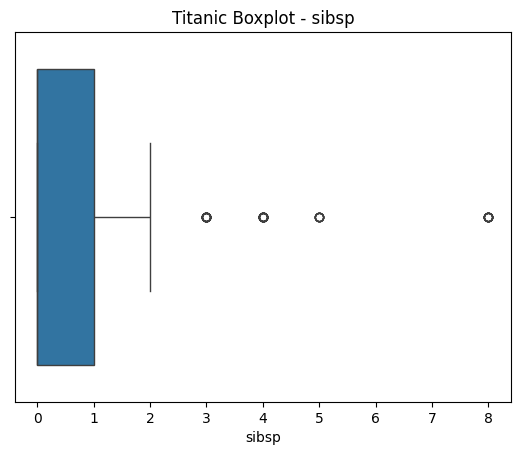

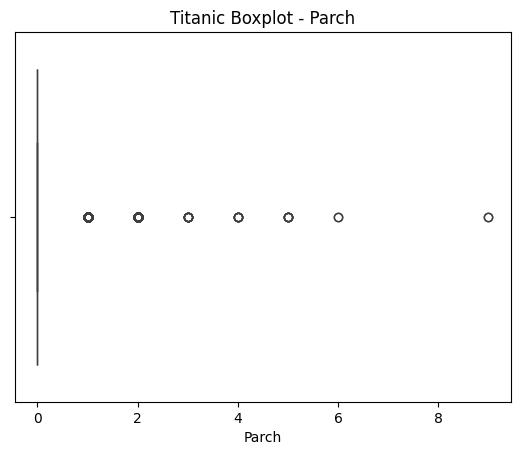

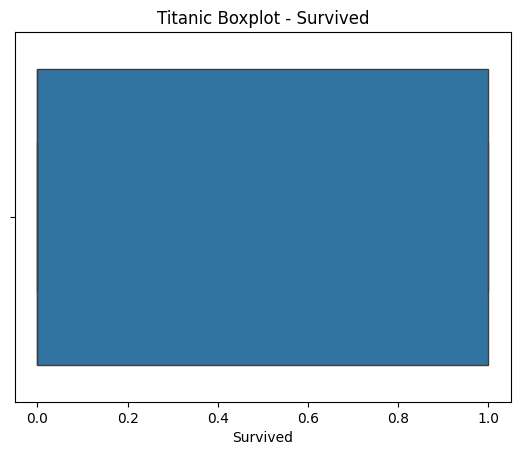

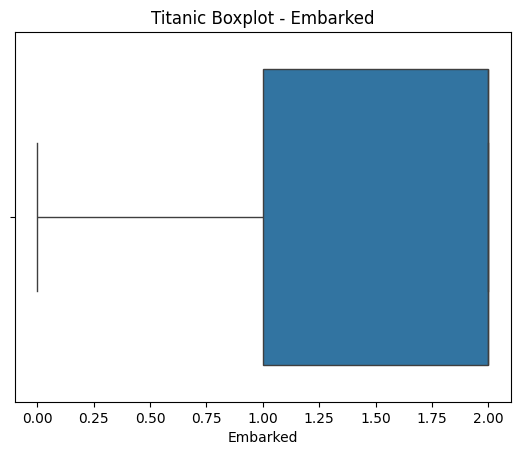

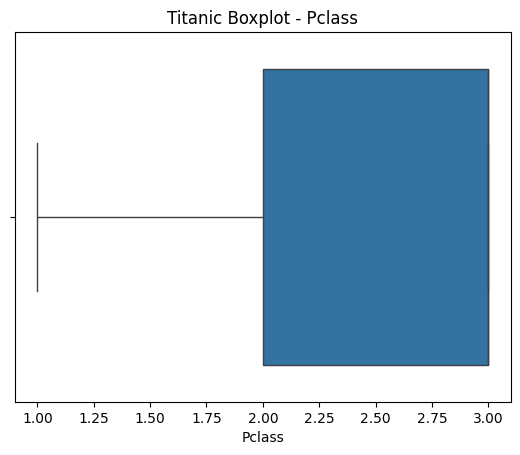

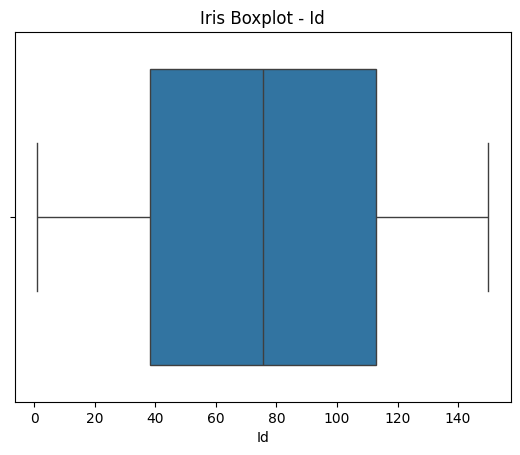

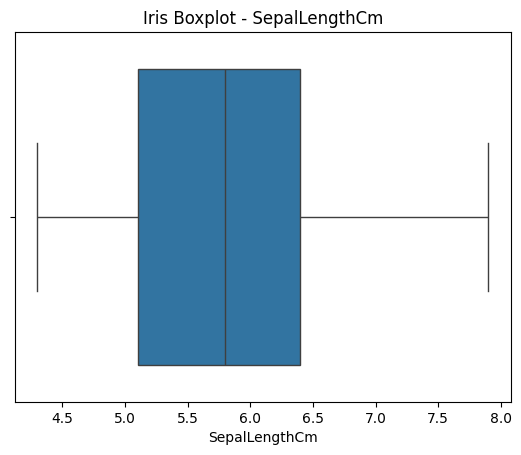

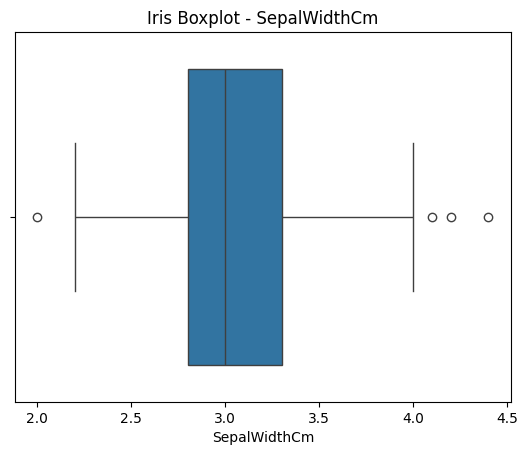

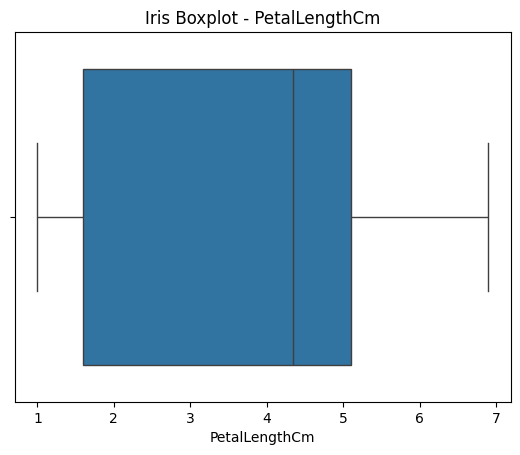

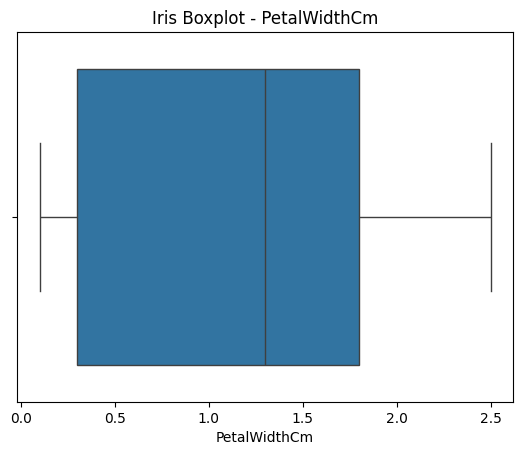

In [5]:
# Histograms
titanic.select_dtypes(include='number').hist(figsize=(10, 6), bins=15)
plt.suptitle("Titanic Numeric Feature Distributions")
plt.show()

iris.select_dtypes(include='number').hist(figsize=(10, 6), bins=15)
plt.suptitle("Iris Numeric Feature Distributions")
plt.show()

# Boxplots
for col in titanic.select_dtypes(include='number').columns:
    sns.boxplot(x=titanic[col])
    plt.title(f"Titanic Boxplot - {col}")
    plt.show()

for col in iris.select_dtypes(include='number').columns:
    sns.boxplot(x=iris[col])
    plt.title(f"Iris Boxplot - {col}")
    plt.show()


In [6]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers[[column]]

# Titanic Outliers
for col in titanic.select_dtypes(include='number').columns:
    outliers = detect_outliers(titanic, col)
    print(f"\n{col} outliers:\n", outliers)

# Iris Outliers
for col in iris.select_dtypes(include='number').columns:
    outliers = detect_outliers(iris, col)
    print(f"\n{col} outliers:\n", outliers)



Passengerid outliers:
 Empty DataFrame
Columns: [Passengerid]
Index: []

Age outliers:
         Age
7      2.00
11    58.00
15    55.00
16     2.00
33    66.00
...     ...
1234  58.00
1245   0.17
1247  59.00
1269  55.00
1278  57.00

[101 rows x 1 columns]

Fare outliers:
           Fare
1      71.2833
27    263.0000
31    146.5208
34     82.1708
52     76.7292
...        ...
1288   79.2000
1291  164.8667
1298  211.5000
1302   90.0000
1305  108.9000

[171 rows x 1 columns]

Sex outliers:
 Empty DataFrame
Columns: [Sex]
Index: []

sibsp outliers:
       sibsp
7         3
16        4
24        3
27        3
50        4
59        5
63        3
68        4
71        5
85        3
88        3
119       4
159       8
164       4
171       4
176       3
180       8
182       4
201       8
229       3
233       4
261       4
266       4
278       4
324       8
341       3
374       3
386       5
409       3
480       5
485       3
541       4
542       4
634       3
642       3
683       5
686

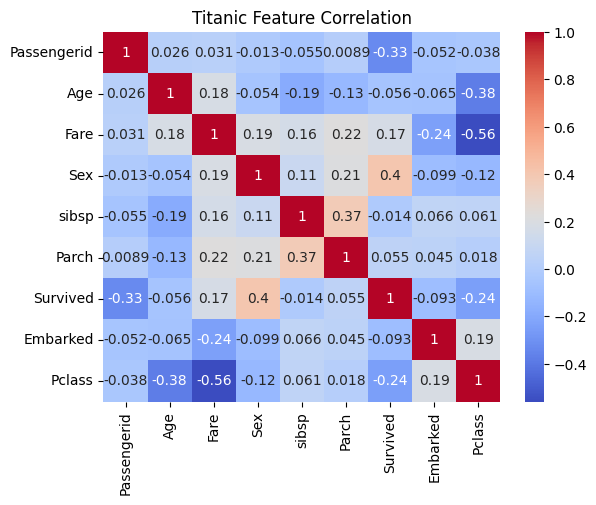

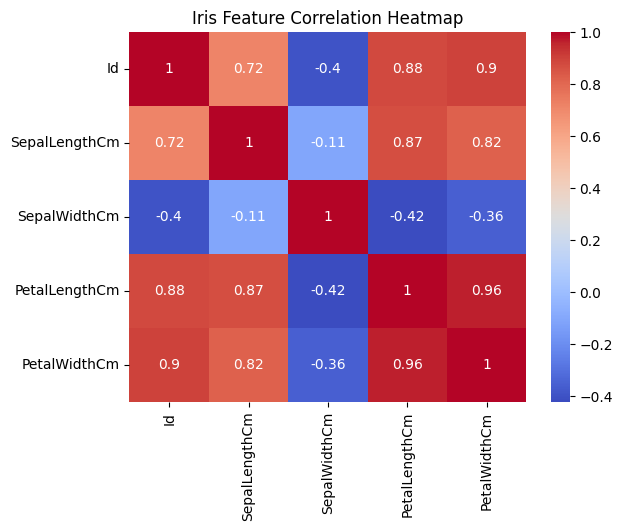

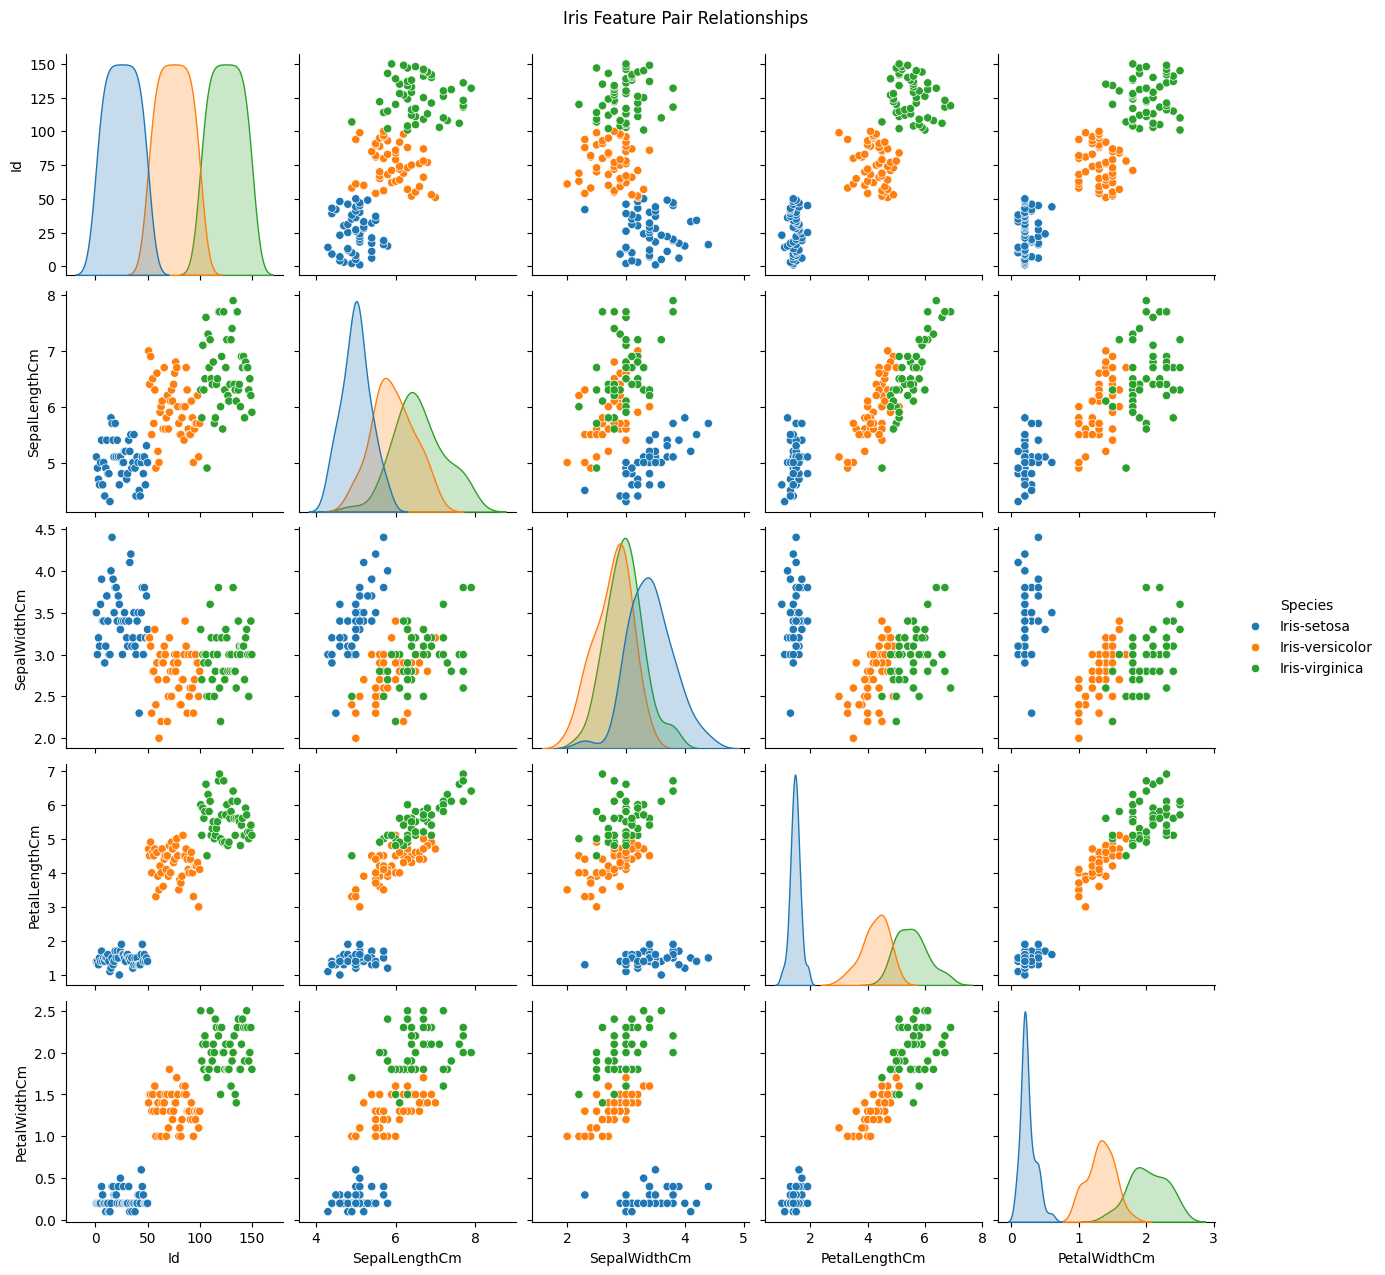

In [7]:
# Titanic Correlation
titanic_corr = titanic.corr(numeric_only=True)
sns.heatmap(titanic_corr, annot=True, cmap='coolwarm')
plt.title("Titanic Feature Correlation")
plt.show()

# Iris Correlation
iris_corr = iris.select_dtypes(include='number').corr()
sns.heatmap(iris_corr, annot=True, cmap='coolwarm')
plt.title("Iris Feature Correlation Heatmap")
plt.show()

# Pairplots to explore feature relationships
sns.pairplot(iris, hue='Species')
plt.suptitle("Iris Feature Pair Relationships", y=1.02)
plt.show()


In [11]:

def analyze_correlation(df, threshold=0.8):
    numeric_df = df.select_dtypes(include='number')
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()

    high_corr_pairs = []
    recommendations = []
    checked = set()

    for i in corr_matrix.columns:
        for j in corr_matrix.columns:
            if i != j and (j, i) not in checked:
                corr_val = corr_matrix.loc[i, j]
                if abs(corr_val) >= threshold:
                    high_corr_pairs.append((i, j, corr_val))
                    recommendation = f" Consider removing one of '{i}' or '{j}' (corr = {corr_val:.2f})"
                    recommendations.append(recommendation)
                checked.add((i, j))

    # Print recommendations
    print("\n Recommendations for Feature Reduction:")
    if recommendations:
        for r in recommendations:
            print(r)
    else:
        print(" No highly correlated feature pairs found above the threshold.")

    return recommendations


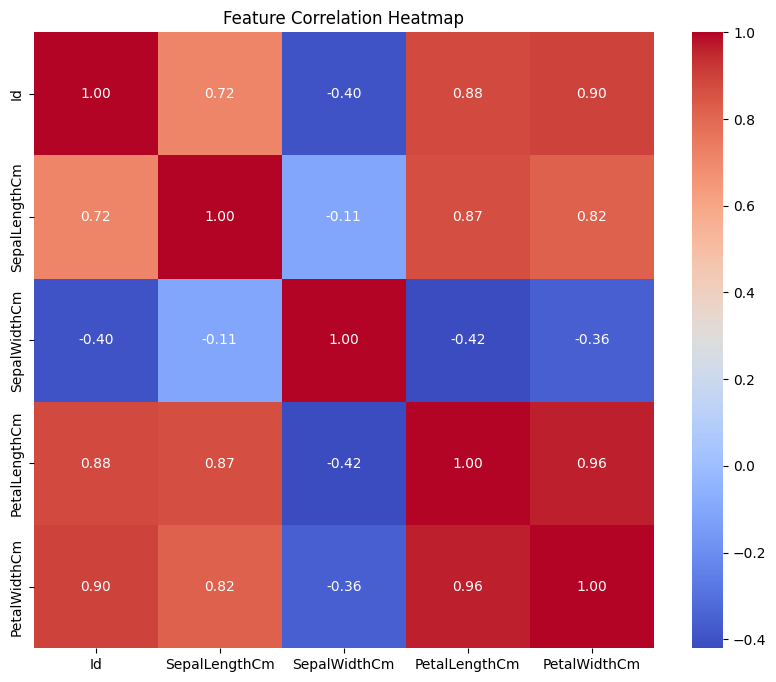


 Recommendations for Feature Reduction:
 Consider removing one of 'Id' or 'PetalLengthCm' (corr = 0.88)
 Consider removing one of 'Id' or 'PetalWidthCm' (corr = 0.90)
 Consider removing one of 'SepalLengthCm' or 'PetalLengthCm' (corr = 0.87)
 Consider removing one of 'SepalLengthCm' or 'PetalWidthCm' (corr = 0.82)
 Consider removing one of 'PetalLengthCm' or 'PetalWidthCm' (corr = 0.96)


In [12]:

recommendations = analyze_correlation(iris)
